# Mandatory assignment 1: Data analysis project - ATP Tennis scores
Vision: Programming is more than writing code. The ultimate goal of the projects in this course
is that you learn to formulate a programming problem of your own choice, and find your own way
to solve it, and present the results. The bullets below are minimum requirements, but otherwise it is
very much up to you, what you will like to do with your project. I hope to see some creative ideas!

We have chosen to approach this project with a kaggle data folder called "Association of Tennis Professionals Matches" and this project will therefore take its starting point in mens atp tennis results and applied statistics. Through the assignment we will examine the descriptive elements of the dataset, inspect the individual players and different tournament levels. We will as well try to illustrate our results through tables, figures, plots and even heat maps for a better mediation as well as a coding level. The project consist of different sections including package import, data structure and analysis and descriptive analysis as well as graphical analysis which are trying to describe, analyse and derive useful conclusions in the realm of ATP results from 2000-2016. 

* **Step 1: Package import:** The first part of code in our project is the use of libraries with essential packages of panda, numpy and glob which is respectively for data structuring and especially arrays and pathnames. On top of that we import statsmodels, matplotlib, geoplot and geopandas for statsitcal modelling, plots and figures as well as heat maps. 

In [3]:
%matplotlib inline
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import geopandas
import geoplot
import geoplot.crs as gcrs
import math
import sqlite3
import datetime as dt
import sqlalchemy
from numpy.random import random
from sqlalchemy import create_engine
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

* **Step 2: Datapath and merge:** Our data project demand one compiled file for further examination and we do therefore have to merge all years between 2000 and 2016 into one csv file called data. We use the element "for" in the range of 2000-2016 to choose all files which have the name "atp_matches_xxxx.csv". Dtype is declaring which kind of variable we include and we declare winner hand, tourney id, tourney date as strings. In the end we concatenate the data and call it data_tennis, which is our main data.

In [4]:
DATAPATH = "Dataset/atp-matches-dataset/"

data = []

for i in range(2000, 2016):
    data.append(pd.read_csv(DATAPATH + "atp_matches_" + str(i) + ".csv", dtype={"winner_hand": str,"tourney_id": str,"tourney_date": str}))

data_tennis = pd.concat(data)




* **Step 3: Changing names of Variables and clear blank cells:** First of all we replace the abbreviated column titles with more meaningful labels. We do then index the master dataset and assign the new name "Tennis_subset" and remove all rows with blank cells in the end for a better statistical analysis.


In [5]:
# We are assigning all variables with a new name
data_tennis.columns = ['Tourney_id','Tourney_name','Surface','Draw_size','Tourney_level','Date',
                      'Match_number','Winner_id', 'Winner_seed', 'Winner_entry',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Winner_rank_points', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank', 'Loser_rank_points', 'Match_score', 'best_of',
       'round', 'minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']

# we are indexing the master dataset and assigning it a new name: "Tennis_subset"
Tennis_subset = data_tennis.loc[:,['Tourney_id', 'Tourney_name', 'Surface', 'Draw_size', 'Tourney_level', 'Date','Match_number', 'Winner_id', 'Winner_seed',
       'Winner_name', 'Winner_hand', 'Winner_hight', 'Winner_country', 'Winner_age',
       'Winner_rank', 'Loser_id', 'Loser_seed',
       'Loser_entry', 'Loser_name', 'Loser_hand', 'Loser_hight', 'Loser_country',
       'Loser_age', 'Loser_rank','minutes', 'Winner_aces', 'Winner_double_faults', 'Winner_serve_points', 'Winner_1st_serve_in', 'Winner_1st_serve_won',
       'Winner_2nd_serve_won', 'Winner_serve_games_played', 'Winner_break_points_saved', 'Winner_break_points_faced', 'Loser_aces', 'Loser_double_faults','Loser_serve_points', 'Loser_1st_serve_in', 'Loser_1st_serve_won', 'Loser_2nd_serve_won', 'Loser_serve_games_played', 'Loser_break_points_saved',
       'Loser_break_points_faced']]

Tennis_subset1 = Tennis_subset.loc[:,['Draw_size', 'Winner_seed', 'Winner_hight', 'Winner_age', 'Winner_rank', 'Winner_aces', 'Winner_double_faults', 'Loser_seed', 'Loser_hight', 'Loser_age', 'minutes', 'Loser_double_faults', 'Loser_aces']]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Draw_size'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['minutes'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_seed'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_hight'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_age'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_rank'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_aces'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['minutes'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Winner_double_faults'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_seed'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_hight'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_age'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_double_faults'].notnull()]
Tennis_subset1 = Tennis_subset1[Tennis_subset1['Loser_aces'].notnull()]


From the descriptive tabel we see 4158 ovservations with an avarage winner age of 25,9 and height of 186,1 with a standard deviation of respectively 3,4 and 6,3. The oldest winner of an ATP match is 36.1 and the youngest 17,8 where the oldest loser age is 36,7 and youngest 17,3. Furthermore we see the avarage loser age is 26.2 and length of the mean match is 114,7 minutes or almost two hours. 2015. A winners hight was between 163 cm and 208 cm, which implies that there is a maximum height difference on 45 cm. The mean height is 186,6 cm which is almost 10 cm higher than the average man. If you are taller than the average man you, therefore, have better chances to be a professional tennis player. The average age for a tennis player was 26 years old while the youngest player was as young as 15 years old. No player is more than 38 years old so you have to start young if young want to become a good player.

* **Step 4: Print a descriptive table:** From the cell above we use the "Tennis_subset1" and make a descriptive table using round for 2 decimals. As we see in the result we have only included some of the variables from the original dataset. 

In [6]:
# description of the subset1
Tennis_subset1.describe()

,Draw_size,Winner_seed,Winner_hight,Winner_age,Winner_rank,Winner_aces,Winner_double_faults,Loser_seed,Loser_hight,Loser_age,minutes,Loser_double_faults,Loser_aces
count,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000,4106.000000
mean,67.818802,5.986361,186.115928,25.831713,15.356795,7.231125,2.352168,9.358987,186.037019,26.199118,114.841452,3.043108,5.646858
std,38.384100,5.780627,6.314394,3.349932,15.508768,5.693162,2.083446,7.633455,6.771769,3.221822,45.011001,2.386389,5.341720
min,28.000000,1.000000,163.000000,17.801506,1.000000,0.000000,0.000000,1.000000,163.000000,17.130732,8.000000,0.000000,0.000000
25%,32.000000,2.000000,183.000000,23.433265,4.000000,3.000000,1.000000,4.000000,183.000000,23.814511,82.000000,1.000000,2.000000
50%,56.000000,4.000000,185.000000,25.775496,10.000000,6.000000,2.000000,7.000000,185.000000,26.120465,107.000000,3.000000,4.000000
75%,96.000000,8.000000,190.000000,27.978097,22.000000,10.000000,3.000000,13.000000,190.000000,28.409993,139.000000,4.000000,8.000000
max,128.000000,33.000000,208.000000,36.106776,124.000000,50.000000,23.000000,33.000000,208.000000,36.706366,353.000000,23.000000,52.000000


From the table and graph below we see the developement of double faults for winners and losers in the period 2000-2013. The variable double faults is created as a ratio between all double faults in one year divided with number of matches and do therefore not depend on matches played. From the graph a clear negative trend is occuring for both winners and losers and 2007 is the year with the fewest double faults for winners. The largest number of faults compared to matches for both winners and losers are the year of 2000 and we assume this trend is decreasing when you go back in time.  
* **Step 5: Faults through time:** We create a dataset we can use for the description of double faults made in the atp series. First of all we use our "Tennis_subset and choose the variables of ID, Winner_double_faults, Loser_double_faults and minutes. We do then count the observation of minutes given a certain year from the first 4 character of the string "Tourney_id" so we can get a total match variable. We do then create our faults ration variable with number of faults in a given year divided with number of games for both winners and losers. In the end we plot the two arrays 'doub. faults lose match', 'doub. faults win match' on the second axis and year on the first axis. 


   Tourney_id  minutes  Winner_double_faults  Loser_double_faults  \
0        2000     2931                9039.0              11448.0   
1        2001     2954                8958.0              11486.0   
2        2002     2816                8372.0              10659.0   
3        2003     2840                8162.0              10257.0   
4        2004     2866                7966.0              10362.0   
5        2005     2896                7570.0               9697.0   
6        2006     2894                7071.0               9249.0   
7        2007     2791                6303.0               8644.0   
8        2008     2750                6455.0               8395.0   
9        2009     2712                6624.0               8344.0   
10       2010     2701                6510.0               8332.0   
11       2011     2626                6454.0               8233.0   
12       2012     2666                6471.0               8407.0   
13       2013     2598            

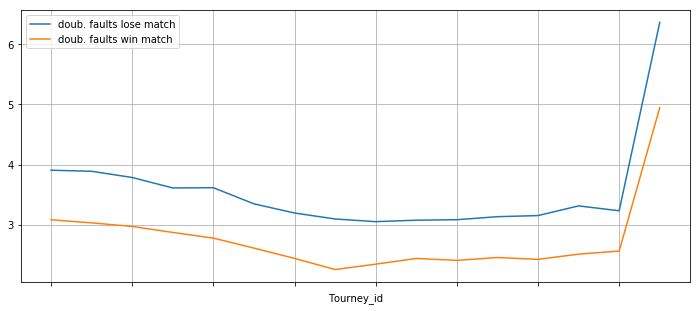

In [9]:
Historic_faults = Tennis_subset.loc[:,["Tourney_id", "Winner_double_faults", "Loser_double_faults", "minutes"]] 
Historic_faults = Historic_faults.groupby(Tennis_subset['Tourney_id'].str[:4]).agg({"minutes":"count", "Winner_double_faults":'sum', "Loser_double_faults":'sum'}).fillna(0).sort_values(["Tourney_id"], ascending=True).reset_index()

Historic_faults['doub. faults win match'] = Historic_faults['Winner_double_faults'] / Historic_faults['minutes']
Historic_faults['doub. faults lose match'] = Historic_faults['Loser_double_faults'] / Historic_faults['minutes']

print(Historic_faults)

Historic_faults.plot(x='Tourney_id', y=['doub. faults lose match', 'doub. faults win match'], figsize=(12,5), grid=True)



In [7]:

Tennis_subset['Date'] = Tennis_subset.Tourney_id.astype(str).str[:4]

Tennis_age_15 = Tennis_subset.loc[Tennis_subset['Date'] == '2015', :]

Tennis_age_15.Winner_age = Tennis_age_15.Winner_age.round()

Tennis_year = Tennis_age_15.groupby(['Winner_age']).agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False).reset_index()      



The first table lists the players from ATP with the most aces. As seen Ivo Karlovic is the player with the most aces in 2015. Karlovic has more than 1.400 aces which are almost 2.000 aces more than John Isner, who is number two on the list. In table two, the ten players, who play in the Grand Slam tournaments, with the most aces are listed. The first person in table two is Kevin Anderson, how has made approximately 350 aces these tournaments. From table one Anderson is number three on the list with around 1.100 aces. It is there easy to conclude that Anderson scores the most aces in tournaments outside the Grand Slams. Roughly 750 aces did Anderson make in other tournaments outside the Grand Slams. From this, we can conclude the Karlovic and Isner are great at making aces but aren't as good as Anderson to make aces on the players who played in the 2015 Grand Slam tournaments.  From table two we see that that there are around 150 aces apart from Anderson and Feliciano Lopez, who are the 10th player with the most aces in the Grand Slams. Karlovic has scored more than twice as many aces compared to Sam Querrey who is number ten on the list in table one.  Even though Roger Federer and Novak Djokovic were some of the best players in 2015 they appear on table two as number eight and nine. Their names cannot be found in table one, which might tell us that they don’t play as many tournaments as for instance Anderson, Karlovic, and Isner.  
* **Step 6: Players with most aces in 2015:** We create a dataset we can use for the description of players with most aces made in the atp series in 2015. First of all we use our "Tennis_age_15" subset and choose the variables of ID, Winner_name, Winner_aces, Loser_name and Loser_aces. We do then sum the observation of aces for both winners and losers. We declare a new variable that is a sum of Loser_aces and Winner_aces. We do then groupby the index and sum all the aces which we call to the variable "final". In the end we plot player names on the second axis and aces on the first axis. For the second figure we do the same, but here we only do it for the grand slames


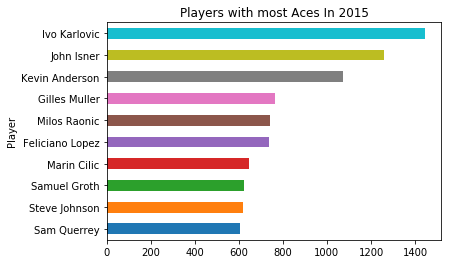

In [13]:
Aces_by_winner = Tennis_age_15.groupby(['Winner_name']).agg({'Winner_aces':'sum'}).fillna(0).sort_values(['Winner_aces'], ascending=False)
Aces_by_loser = Tennis_age_15.groupby(['Loser_name']).agg({'Loser_aces':'sum'}).fillna(0).sort_values(['Loser_aces'], ascending=False)
dfs = [Aces_by_winner,Aces_by_loser]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['Loser_aces']+r['Winner_aces']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)

final.plot('Player','Aces', kind='barh', title='Players with most Aces In 2015', legend=False)



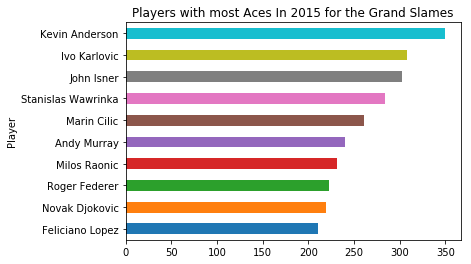

In [14]:
Tennis_age_15_level = Tennis_age_15.loc[Tennis_age_15['Tourney_level'] == 'G', :]

sw = Tennis_age_15_level.groupby(['Winner_name']).agg({'Winner_aces':'sum'}).fillna(0).sort_values(['Winner_aces'], ascending=False)
sl = Tennis_age_15_level.groupby(['Loser_name']).agg({'Loser_aces':'sum'}).fillna(0).sort_values(['Loser_aces'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['Loser_aces']+r['Winner_aces']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(10)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)

final.plot('Player','Aces', kind='barh', title='Players with most Aces In 2015 for the Grand Slames', legend=False)


In [15]:
Grand_slams = Tennis_subset.loc[Tennis_subset['Tourney_level'] == 'G', ["Tourney_name", "Winner_name", "Surface"]]

Grand_slams1 = Grand_slams.groupby(['Tourney_name', "Surface"]).agg({"Winner_name":'count'}).fillna(0).sort_values(["Winner_name"], ascending=False).reset_index()

Grand_slams_table = Grand_slams1.loc[:,["Tourney_name", "Surface"]]

Grand_slams_table.head()

,Tourney_name,Surface
0,Australian Open,Hard
1,Roland Garros,Clay
2,US Open,Hard
3,Wimbledon,Grass


We have created a dropdown list that illustrate the players on the ATP tour with most Grand Slames titles. We see that Roger Federer and Rafael Nadal are the only players who have manage to win all the four Grand Slames titles. Moreover, we see from the table down below that Roger Federer is the most winning Grand Slames player from 2000 til 2015 with 17 Grand Slames victories.
  
* **Step 7: Players with most Grand Slames titles:** We create a dataset we can use for the description of players with most Grand Slames titles from 2000 to 2015. First of all we use our "Tennis_subset" and choose the variables of ID, Winner_name, Tourney_name, Match_number and Draw_size. First of all, we start by add all values in "Match_number" by one and call it to a new variable called "Match_number2". This variable are equalized with "Draw_size" and call to a new variable "Tourney_win". The new variable is a dummy for tournament wins which we use to count the number of tournament wins for each player. We do then slize the dataset and keep all row values that are equal to a Grand Slames tournament and a victory of a Grand Slames tournament. We do then groupby the "Tourney_name" and "winner_name", where we sum all the tourney wins. In the end we plot player names on the first axis and Grand Slames wins on the first axis.

In [36]:
Tennis_subset['Match_number2'] = Tennis_subset['Match_number'] + 1
Tennis_subset['Tourney_win'] = np.where(Tennis_subset['Match_number2'] == Tennis_subset['Draw_size'], 1 , 0)

Grand_slams_players = Tennis_subset.loc[Tennis_subset['Tourney_level'] == 'G', ["Tourney_name", "Winner_name", "Tourney_win"]]
Grand_slams_players1 = Grand_slams_players.loc[Grand_slams_players['Tourney_win'] == 1, ["Tourney_name", "Winner_name", "Tourney_win"]]

Grand_slams_players2 = Grand_slams_players.groupby(["Tourney_name", "Winner_name"]).agg({"Tourney_win":'sum'}).fillna(0).sort_values(["Tourney_win"], ascending=False).reset_index()
Grand_slams_players3 = Grand_slams_players2.loc[Grand_slams_players2['Tourney_win'] >= 1, ["Tourney_name", "Winner_name", "Tourney_win"]]


In [37]:
import ipywidgets as widgets
def plot_e(dataframe, Tourney_name): 
    I = dataframe['Tourney_name'] == Tourney_name
    ax=dataframe.loc[I,:].plot.bar(x='Winner_name', y='Tourney_win', style='-o', legend='False')

widgets.interact(plot_e, 
    dataframe = widgets.fixed(Grand_slams_players3),
    Tourney_name = widgets.Dropdown(description='Tourney_name', options=Grand_slams_players3.Tourney_name.unique(), value='US Open')
);

interactive(children=(Dropdown(description='Tourney_name', index=3, options=('Roland Garros', 'Wimbledon', 'Au…

In [17]:
Grand_slams_total_Player = Grand_slams_players2.loc[:,["Winner_name", "Tourney_win", "Tourney_sum"]] 

Grand_slams_total_Player = Grand_slams_total_Player.groupby(["Winner_name"]).agg({"Tourney_win":'sum'}).fillna(0).sort_values(["Tourney_win"], ascending=False).reset_index()

Grand_slams_total_Player.head(10)

,Winner_name,Tourney_win
0,Roger Federer,17
1,Rafael Nadal,14
2,Novak Djokovic,10
3,Andre Agassi,3
4,Gustavo Kuerten,2
5,Lleyton Hewitt,2
6,Marat Safin,2
7,Stanislas Wawrinka,2
8,Andy Murray,2
9,Pete Sampras,2


From the figure below we see the regions where most winning players grew up are Europe, Amerika, Australia some areas of Asia. Furthermore, we se that spain, england, russia and USA are the countries with the most winning tennis players. This is not a suprise since the top 10 players from the Tennis World Ranking list are from those countries. Moreover, we see that tennis is not a sport in Asia, which is a statement that are well supported by the fact that the asian people in average are below the average hight on 1.86 for Tennis men.
* **Step 8: Worldmap of where players are comming from:** We create a dataset we can use for the description of which part of the world players are comming from. First of all, we use our "Tennis_subset and choose the variables of ID, Winner_country and Winner_id. We do then count the observation of winner_id given a home country. We do then import a zip file that include country data which we merge with our most_wins variable. We then plot the worldmap by using the function geoplot. 

In [ ]:
most_wins = Tennis_subset.groupby('Winner_country').agg({'Winner_id':'count'}).fillna(0).sort_values(['Winner_id'], ascending=False).reset_index()

# Download new world map
import io
import requests
import shutil
import zipfile
if os.path.exists("Dataset/map"):
    shutil.rmtree("Dataset/map")
    os.mkdir("Dataset/map")
    
# get world shapefile with country borders
world = requests.get('http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip')
world_zip = zipfile.ZipFile(io.BytesIO(world.content))
zipfile.ZipFile.namelist(world_zip)
world_zip.extractall("Dataset/map")
world_map = geopandas.read_file('TM_WORLD_BORDERS-0.3.shp')

In [6]:
path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)

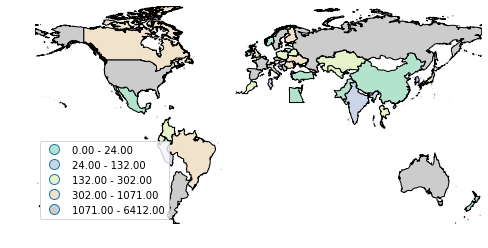

In [27]:
# Merge geodata with most wins and plot
df_plot = world_map[['ISO3', 'NAME', 'geometry']].merge(most_wins.rename(columns={'Winner_country': 'ISO3'})).rename(columns={'Winner_id': 'wins'})
geoplot.choropleth(df_plot, hue='wins', cmap='Pastel2', legend=True, figsize=(8, 4))